Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [21]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [13]:
crosstab.reset_index(inplace=True)
crosstab

isBestSeller,category,False,True
0,3D Printers,247,1
1,3D Printing & Scanning,4065,2
2,Abrasive & Finishing Products,245,5
3,Action Cameras,1696,1
4,Adapters,251,3
...,...,...,...
291,Wind Instruments,243,7
292,Window Treatments,234,5
293,Women,17559,213
294,Women's Sports & Outdoor Shoes,1939,20


In [17]:
crosstab["proportion"] = crosstab[True] / (crosstab[True] + crosstab[False])
crosstab.sort_values(by = "proportion", ascending=False).head(20)

isBestSeller,category,False,True,proportion
109,Grocery,9008,556,0.058135
254,Smart Home Security & Lighting,98,6,0.057692
126,Health & Personal Care,9017,552,0.057686
185,Mobile Phone Accessories,248,11,0.042471
229,Power & Hand Tools,8353,306,0.035339
26,"Billiard, Snooker & Pool",241,8,0.032129
221,Pet Supplies,9152,285,0.030200
136,Home Brewing & Wine Making,239,7,0.028455
291,Wind Instruments,243,7,0.028000
184,Mirrors,243,7,0.028000


In [19]:
from scipy.stats import chi2_contingency

In [ ]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [24]:
from scipy.stats.contingency import association

In [25]:
association(crosstab, method="cramer")

0.1222829439760564

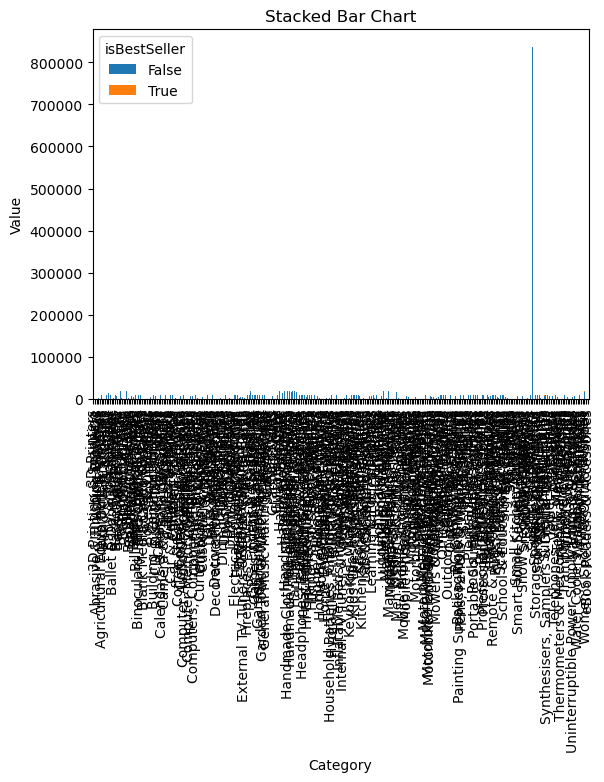

In [ ]:
# Plotting the stacked bar chart
crosstab.plot(kind='bar', stacked=True)

# Customizing the plot (optional)
plt.title('Stacked Bar Chart')
plt.ylabel('Value')
plt.xlabel('Category')

# Display the plot
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [55]:
IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)

Q3 =df['price'].quantile(0.75)
Q1 = df['price'].quantile(0.25)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [ ]:
category_counts = df_no_outliers['category'].value_counts()

top_categories = category_counts.head(20).index

df_top_categories = df_no_outliers[df_no_outliers['category'].isin(top_categories)]


In [57]:
category_counts

Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
                                           ...  
Home Entertainment                            57
Smart Speakers                                49
Alexa Built-In Devices                        39
3D Printers                                   36
Motorbike Exhaust & Exhaust Systems           28
Name: category, Length: 296, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

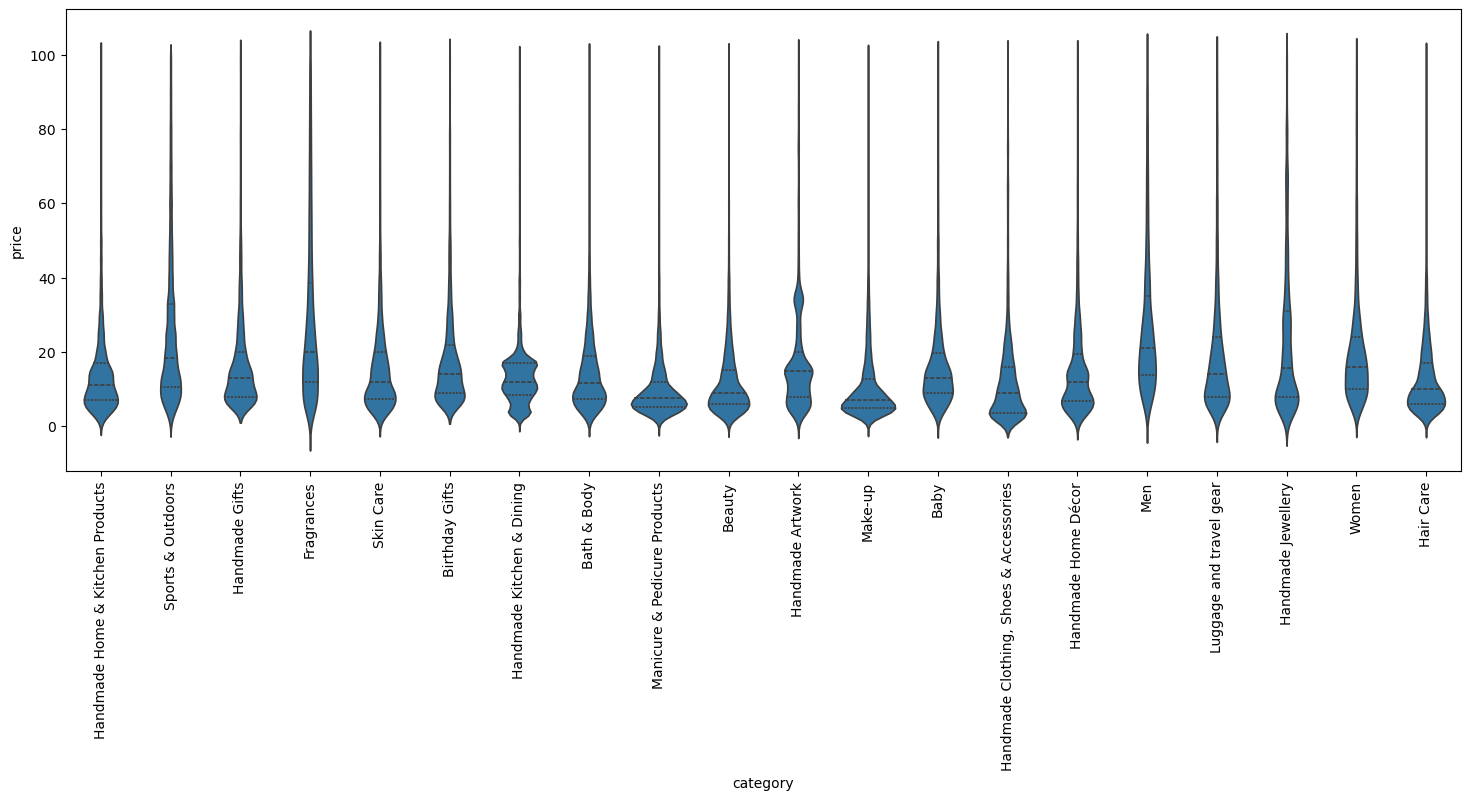

In [63]:
plt.figure(figsize=(18, 6))
sns.violinplot(x='category', y='price', data=df_top_categories, inner="quart")
plt.xticks(rotation=90)

C:\Users\javie\AppData\Local\Temp\ipykernel_22312\3374653785.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_top_10.index, y=avg_price_top_10.values, palette='viridis')


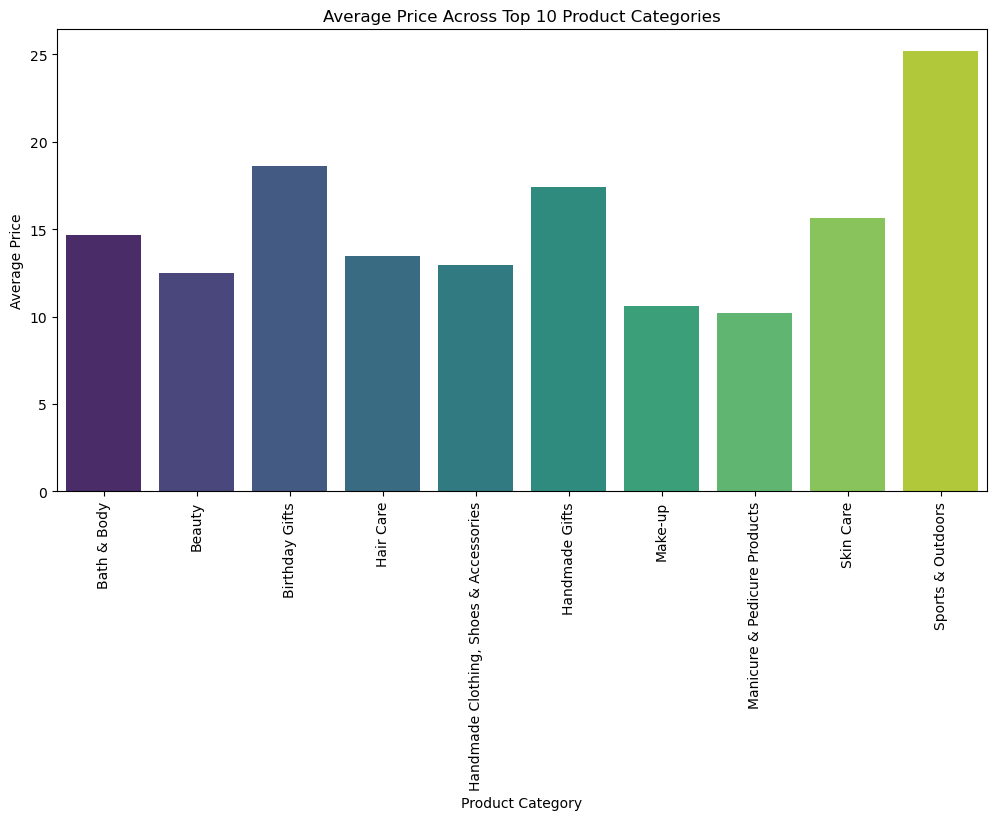

The category with the highest average price is Motherboards with an average price of 68.77.


In [ ]:
avg_price_per_category = df_no_outliers.groupby('category')['price'].mean()

top_10_categories = df_no_outliers['category'].value_counts().head(10).index

df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

avg_price_top_10 = df_top_10.groupby('category')['price'].mean()

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_top_10.index, y=avg_price_top_10.values, palette='viridis')
plt.xticks(rotation=90) 
plt.title('Average Price Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.show()


In [ ]:
highest_avg_price_category = avg_price_per_category.idxmax()
highest_avg_price = avg_price_per_category.max()

print(f"The category with the highest average price is {highest_avg_price_category} with an average price of {highest_avg_price:.2f}.")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

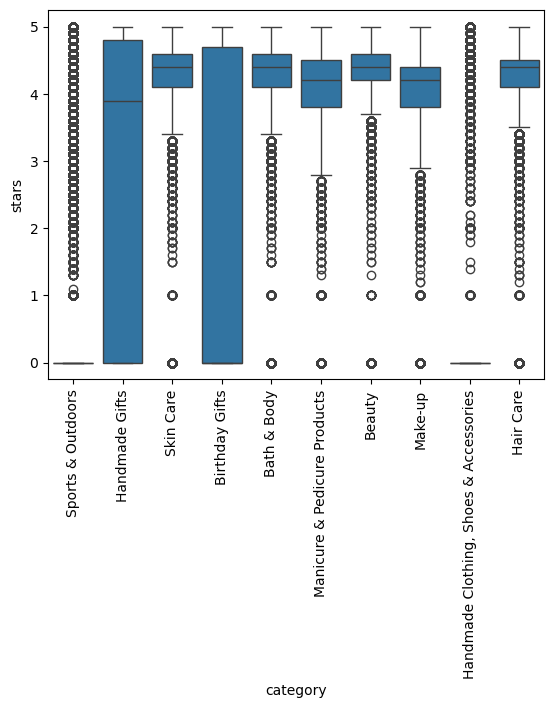

In [67]:
sns.boxplot(x='category', y='stars', data=df_top_10)
plt.xticks(rotation=90)

In [68]:
df.groupby('category')['stars'].mean().sort_values(ascending=False).head(10)


category
Luxury Food & Drink                    4.547570
Grocery                                4.469061
Laptop Accessories                     4.449600
Health & Personal Care                 4.439649
Arts & Crafts                          4.432663
Office Paper Products                  4.429804
Customers' Most Loved                  4.409956
Water Coolers, Filters & Cartridges    4.363636
USB Hubs                               4.356800
Cables & Accessories                   4.342990
Name: stars, dtype: float64

Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?
Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [79]:
correlation_price_stars, p_value = stats.pearsonr(df_no_outliers['price'], df_no_outliers['stars'])

correlation_price_stars,p_value

(-0.07767299878181357, 0.0)

<Axes: xlabel='stars', ylabel='price'>

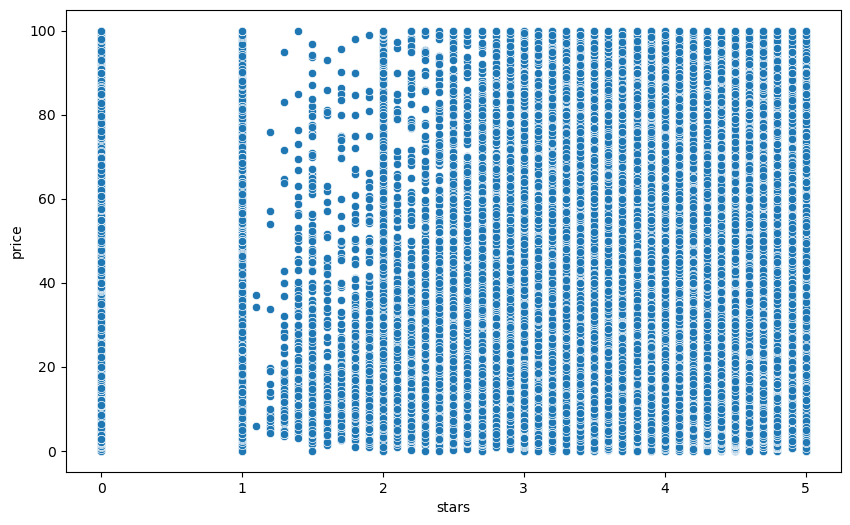

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=df_no_outliers)


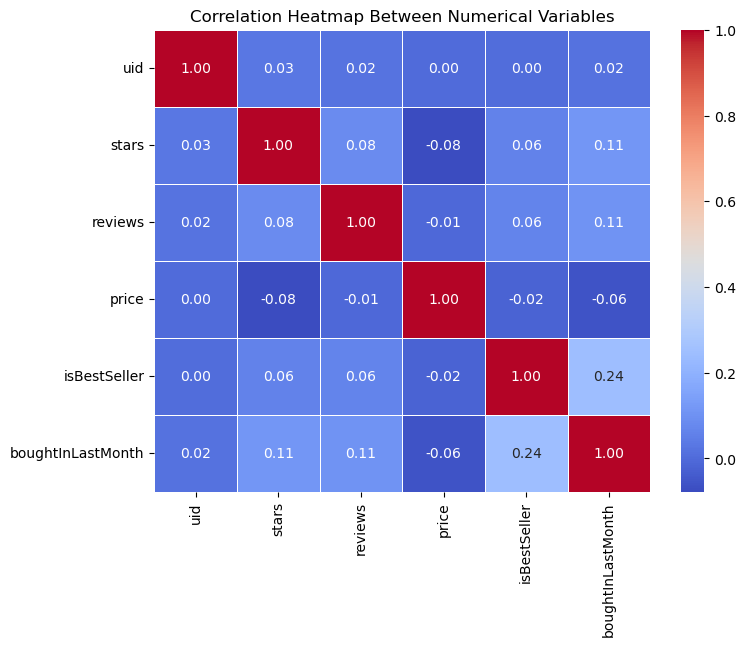

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = df_no_outliers.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Between Numerical Variables')
plt.show()


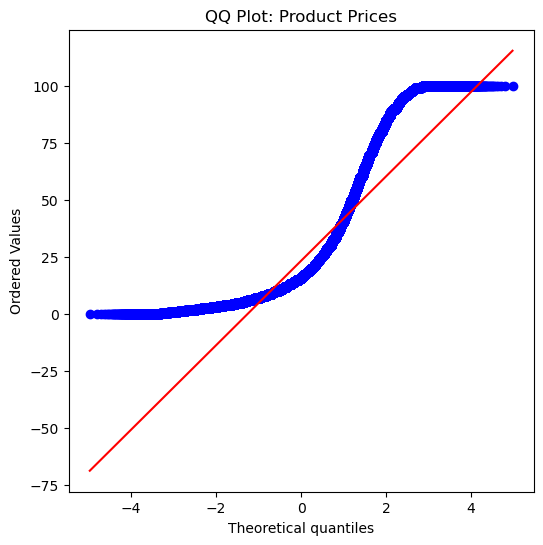

In [77]:
plt.figure(figsize=(6, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot: Product Prices')
plt.show()